# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [1]:
# Import all the dependencies here. 
from unityagents import UnityEnvironment
import numpy as np
import random
from collections import namedtuple, deque
import torch

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Deep Q Network

We have implemented the model architecture and the Agent in separate files model.py and agent.py which we need to import first

In [5]:
from agent import Agent

Initialise the agent based on the environment we are working on. We give the agent the `state_size` and the `action_size` based on which it will create the agent.

In [6]:
agent = Agent(state_size, action_size, 0)

Here we define the basic Deep Q Learning algorithm with experience replay. We keep storing the score that the agent is able to achieve and also keep calculating the average score every 100 episodes. The training stops when the average score is greater than or equal to 14.0. 

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]                     # get the current starting state of the agent
        score = 0                                                   # initialise score to 0 at start of each episode
        for t in range(max_t):
            action = agent.act(state, eps)                          # generate an action by the agent with an epsilon greedy policy
            env_info = env.step(action)[brain_name]                 # execute the action on the environment
            next_state = env_info.vector_observations[0]            # get the next state
            reward = env_info.rewards[0]                            # get the reward
            done = env_info.local_done[0]                           # get the done indicator
            agent.step(state, action, reward, next_state, done)     # here the agent learns from the environment's reaction to it's action.
            state = next_state         # move to the next state
            score += reward            # update the score
            if done:
                break 
        scores_window.append(score)       # save most recent 100 score in the queue to get an average
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Now let's start the training process. 

In [8]:
scores = dqn()
env.close()

Episode 100	Average Score: 0.42
Episode 200	Average Score: 2.88
Episode 300	Average Score: 6.55
Episode 400	Average Score: 10.00
Episode 500	Average Score: 12.70
Episode 516	Average Score: 13.02
Environment solved in 416 episodes!	Average Score: 13.02


Let's visualise the improvement of the score through the episodes.

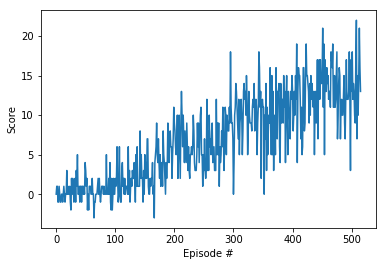

In [10]:
import matplotlib.pyplot as plt
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Load and test out the trained agent

Let's reload a fresh environment for the test

In [53]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [54]:
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

# Initialise a new agent
agent = Agent(state_size, action_size, 0)
# Laod the learned weights into the new agent
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

Let's test it out now. 

In [55]:
state = env_info.vector_observations[0]
score = 0

# for episode in range(5):
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]       
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]   
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0]
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if done:
        break
            
print("Score: {}".format(score))

Score: 6.0


In [56]:
env.close()

As you can see, we were able to get a score of 6 from one episode. This can be further improved if we keep training the model for more iterations instead of stopping it at 13 score. Here's a [video](https://youtu.be/eosQY96CPOQ) of the agent picking up bananas.